In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import scipy.stats as st

import pdb
import sys
sys.path.append('../')
import fig_format

In [2]:
data_str = 'v2'
data_path = f'data/patterns_{data_str}.json'

with open(data_path, 'r') as f:
    data = json.load(f)

In [4]:
data_c1 = data[:10]
data_c2 = data[11:]

In [10]:
pd.DataFrame(data[0]['data']).query('type == "draw"')

,ix,type,phase,step,pattern,set,start_time_abs,pretrial_time,end_time,trial_time,pointer_data,error,score,move_time,shape_correct
0,0,draw,0,0,4_41,practice,26063.7,-2099.2,1216.6,27281.3,"{'time': [], 'x': [], 'y': []}",2,0.0,NaN,NaN
1,0,draw,0,0,4_41,practice,30587.5,-1307.8,1507.8,1166.3,"{'time': [341.5, 350.5, 358.3, 366.8, 375, 383...",0,56.6,341.5,1.0
2,0,draw,0,0,4_41,practice,35036.0,-1432.9,1910.0,1034.9,"{'time': [875.1, 883.5, 891.7, 900.3, 908.5, 9...",0,55.1,875.1,1.0
9,1,draw,1,1,4_40,main,95093.7,-2016.3,1858.0,1266.3,"{'time': [591.7, 600.8, 608.5, 616.5, 624.9, 6...",0,46.7,591.7,1.0
10,2,draw,1,1,4_40,main,99950.5,-1491.0,1974.2,1149.4,"{'time': [824.8, 833, 841.5, 850, 858.2, 866.3...",0,63.4,824.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,16,draw,1,4,7_65,main,956422.9,-316.7,1649.6,1157.8,"{'time': [491.8, 500.4, 509.7, 517.1, 525.1, 5...",0,28.6,491.8,1.0
175,17,draw,1,4,7_65,main,960938.4,-1366.4,1990.9,1583.0,"{'time': [407.9, 416.6, 425.1, 433.4, 441.4, 4...",0,75.5,407.9,1.0
176,18,draw,1,4,7_65,main,965420.6,-983.0,1824.2,1715.8,"{'time': [108.4, 116.6, 124.9, 133.5, 141.9, 1...",0,73.0,108.4,1.0
177,19,draw,1,4,7_65,main,969160.8,-416.2,2114.5,1572.5,"{'time': [542, 552.2, 560, 568.3, 575.9, 583.6...",0,78.3,542.0,1.0


In [7]:
p1_scores = []
p2_scores = []
p3_scores = []

difs_c1 = []

# participant = data[6]
difs_c1 = {1:[], 2:[], 3:[], 4:[]}
for participant in data_c1:
    td = pd.DataFrame(participant['data'])
    td = td[td['set'] == 'main']

    for i in range(1,5):
        tdi = td[td['step'] == i]
        pattern = tdi.pattern.iloc[0]

        # pdb.set_trace()
        p1_score = tdi[tdi['phase'] == 1]['score']
        p2_score = tdi[tdi['phase'] == 2]['score']
        p3_score = tdi[tdi['phase'] == 3]['score']
        
        pb_score = td.query('phase == 3 & step == 5 & pattern == @pattern').score
#         print(td.query('phase == 3 & step == 5 & pattern == @pattern'))

        # p1_scores.append(np.mean(p1_score))
        # p3_scores.append(np.mean(p3_score))

        difs_c1[i].append((np.mean(p1_score), np.mean(p2_score), np.mean(p3_score), np.mean(pb_score)))
        

In [6]:
# df = pd.read_json(data_path)

p1_scores = []
p2_scores = []
p3_scores = []

difs_c2 = []

# participant = data[6]
difs_c2 = {1:[], 2:[], 3:[], 4:[]}
for participant in data_c2:
    td = pd.DataFrame(participant['data'])
    td = td[td['set'] == 'main']

    for i in range(1,5):
        tdi = td[td['step'] == i]
        pattern = tdi.pattern.iloc[0]

        # pdb.set_trace()
        p1_score = tdi[tdi['phase'] == 1]['score']
        p2_score = tdi[tdi['phase'] == 2]['score']
        p3_score = tdi[tdi['phase'] == 3]['score']
        
        pb_score = td.query('phase == 3 & step == 5 & pattern == @pattern').score
#         print(td.query('phase == 3 & step == 5 & pattern == @pattern'))

        # p1_scores.append(np.mean(p1_score))
        # p3_scores.append(np.mean(p3_score))

        difs_c2[i].append((np.mean(p1_score), np.mean(p2_score), np.mean(p3_score), np.mean(pb_score)))
        
    

In [8]:
difs_

NameError: name 'difs' is not defined

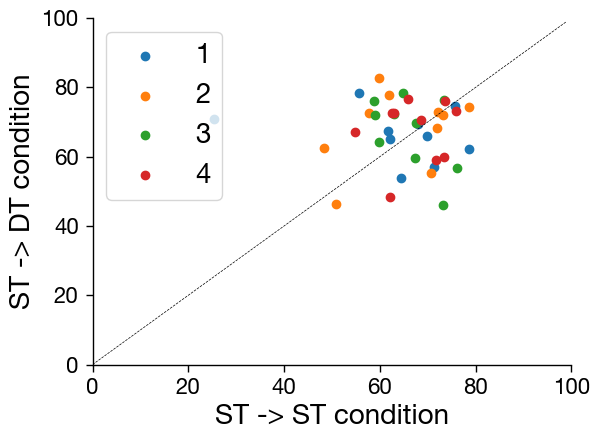

In [65]:
# 0 is learn
# 1 is st/dt
# 2 is test
# 3 is bonus

for i in range(1,5):
  uz2 = list(zip(*difs_c1[i]))
  uz1 = list(zip(*difs_c2[i]))  
  plt.scatter(uz1[3], uz2[3], label=i)

plt.xlim([0,100])
plt.ylim([0,100])
plt.xlabel('ST -> ST condition')
plt.ylabel('ST -> DT condition')
plt.plot(np.arange(100), np.arange(100), lw=.5, ls='--', c='black')
plt.legend()
fig_format.hide_frame(plt.gca())
plt.show()

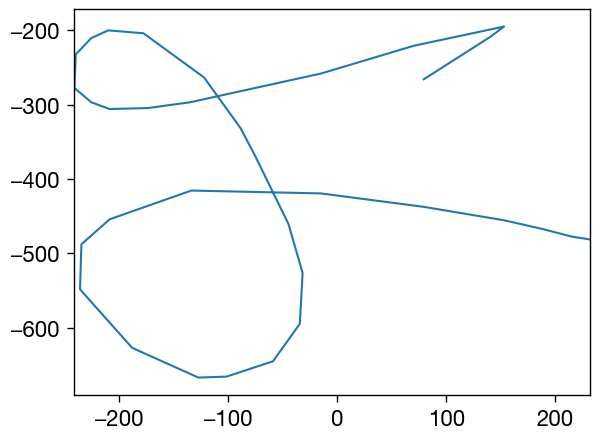

In [63]:
participant = data[2]
td = pd.DataFrame(participant['data'])
td = td[td['set'] == 'main']

tdi = td[td['step'] == 4]
pointer_data = tdi.iloc[11].pointer_data
x, y = pointer_data['x'], pointer_data['y']
plt.plot(x, y)
plt.show()

In [132]:
pd.set_option('display.max_rows', None)  # or 1000

In [40]:
pd.DataFrame(data_c1[5]['data']).query('phase == 2').shape_correct.sum()

80.0

In [48]:
data_c1[3]['config']

{'id': '5f512f61',
 'is_prolific': True,
 'is_sona': False,
 'institution': 'yale',
 'description': 'intentional-patterns v2_bonus',
 'datetime': '2022-10-19T18:29:04.503Z',
 'already_visited': False,
 'width': 1800,
 'height': 1200,
 'renderer': 'webgl',
 'user_agent': {'browser': {'name': 'Chrome',
   'version': '106.0.0.0',
   'major': '106'},
  'os': {'name': 'Mac OS', 'version': '10.15.7'}},
 'fullscreen_supported': True,
 'is_debug': False,
 'version': 1,
 'condition': '2'}